In [6]:
import numpy as np
import pandas as pd
import os
from dataloader import OCTDataset
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import pandas as pd
from PIL import Image
import argparse
import os
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torch.utils.data import ConcatDataset
from sklearn.metrics import classification_report



# Path information
root = os.getcwd()
train = os.path.join(root, "df_prime_train.csv")
test = os.path.join(root, "df_prime_test.csv")


# Label map
LABELS_SEVERITY = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}


mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)


# horizontal flip transform
transformHor = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.ToTensor(),
    normalize,
])

# crop transform
transformCrop = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.CenterCrop((224 - 25 - 25, 224)),
    transforms.Pad(padding=(0, 25, 0, 25), fill=0),
    transforms.ToTensor(),
    normalize
])

# blur transform
transformBlur = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    normalize
])

# Standard Transform
transform2 = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    normalize,
])


args = 'C:/Users/jgril/Documents/GitHub/8803_Final_Project'

# create standard dataset
image_trainset = OCTDataset(args, 'train', transform=transform2)
image_testset = OCTDataset(args, 'test', transform=transform2)

# create augment versions of the dataset
flip_trainset = OCTDataset(args, 'train', transform=transformHor)
blur_trainset = OCTDataset(args, 'train', transform=transformBlur)
crop_trainset = OCTDataset(args, 'train', transform=transformCrop)

In [7]:
'''
# count pictures in each class for TRAINING DATA
class_counts = {}
for _, label in image_trainset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Training Data Class counts:", class_counts)
print()

# count pictures in each class for TESTING DATA
class_counts = {}
for _, label in image_testset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Testing Data Class counts:", class_counts)
print()
'''


""" For Class 0 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 0]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_0 = Subset(flip_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in flip_trainset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1
print("Flip Data Class 0 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in flip_trainset_class_0:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(flip_trainset_class_0))
print()
'''
""" For Class 2 Flip"""

# get the labels
labels = flip_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 2]
# create a new dataset that only includes data points with label value 0
flip_trainset_class_2 = Subset(flip_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in flip_trainset_class_2:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Flip Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in flip_trainset_class_2:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(flip_trainset_class_2))
print()
'''



""" For Class 0 Blur"""

# get the labels
labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 0]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_0 = Subset(blur_trainset, indices)

'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in blur_trainset_class_0:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Blur Data Class 0 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in blur_trainset_class_0:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(blur_trainset_class_0))
print()
'''

""" For Class 2 Blur"""

labels = blur_trainset._labels
# create a list of indices corresponding to data points with label value 0
indices = [i for i, label in enumerate(labels) if label == 2]
# create a new dataset that only includes data points with label value 0
blur_trainset_class_2 = Subset(blur_trainset, indices)


'''
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in blur_trainset_class_2:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Blur Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in blur_trainset_class_2:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(blur_trainset_class_2))
print()
'''

# New Dataset with extra class 2 images
concatenated_dataset = ConcatDataset([image_trainset, blur_trainset_class_2])
# count pictures in each class for FLIP TRAIN DATA
class_counts = {}
for _, label in concatenated_dataset:
    if label not in class_counts:
        class_counts[label] = 0
    class_counts[label] += 1

print("Concated Data Class 2 counts:", class_counts)

# check to see if there is only one class
unique_labels = set()
for _, label in concatenated_dataset:
    unique_labels.add(label)
num_classes = len(unique_labels)
print("Number of classes:", num_classes, "Total Length", len(concatenated_dataset))


Concated Data Class 2 counts: {2: 9408, 1: 11760, 0: 7788}
Number of classes: 3 Total Length 28956


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# function creates saliency map

def saliency_map(img, model):
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input = torch.reshape(img.to(device),(1,1,224,224))
    input.requires_grad = True

    output = model(input)
    score, indices = torch.max(output, 1)
    score.backward()

    slc, _ = torch.max(torch.abs(input.grad[0]), dim=0)

   

    #plot image and saleincy map
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(torch.reshape(img,shape=(224,224,1)),cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 2, 2)
    plt.imshow(slc.cpu().numpy(), cmap='afmhot')
    plt.xticks([])
    plt.yticks([])
    plt.show()

## Original

c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.041
[1,   200] loss: 1.014
[1,   300] loss: 1.016
Train accuracy after epoch 1: 48.42 %
Validation accuracy after epoch 1: 49.25 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.01
[2,   100] loss: 0.992
[2,   200] loss: 0.997
[2,   300] loss: 0.995
Train accuracy after epoch 2: 50.09 %
Validation accuracy after epoch 2: 49.87 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.99
[3,   100] loss: 0.980
[3,   200] loss: 0.980
[3,   300] loss: 0.971
Train accuracy after epoch 3: 51.41 %
Validation accuracy after epoch 3: 53.21 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.98
[4,   100] loss: 0.969
[4,   200] loss: 0.960
[4,   300] loss: 0.956
Train accuracy after epoch 4: 52.71 %
Validation accuracy after epoch 4: 50.90 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.96
[5,   100] loss: 0.959
[5,   200] loss: 0.942
[5,   300] loss: 0.945
Train accuracy after epoch 5: 53.71 %
Valida

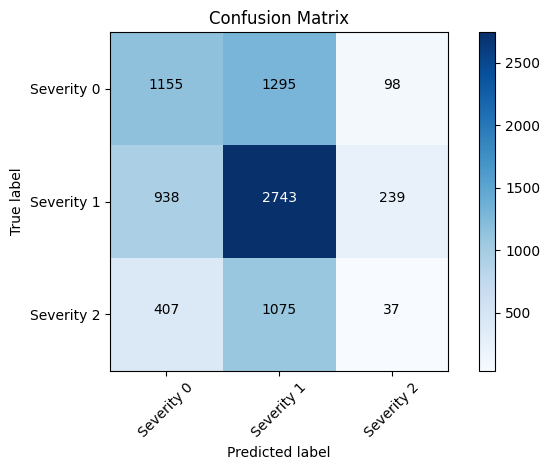

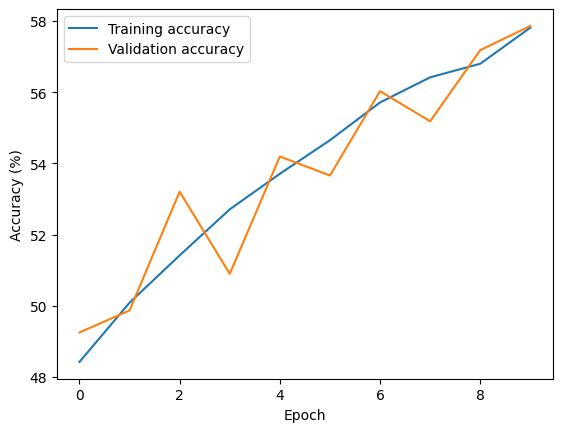

Train Accuracy:  [48.42018452657079, 50.0850471625174, 51.41487552188032, 52.70862326684192, 53.708571723107056, 54.65182207102727, 55.71362300912324, 56.41977217669192, 56.80119581464873, 57.816607391371576]
Validation Accuracy:  [49.24757781900639, 49.86600700886415, 53.205524634096065, 50.89672232529375, 54.19501133786848, 53.659039373325086, 56.029684601113175, 55.1844980416409, 57.184085755514324, 57.86435786435786]



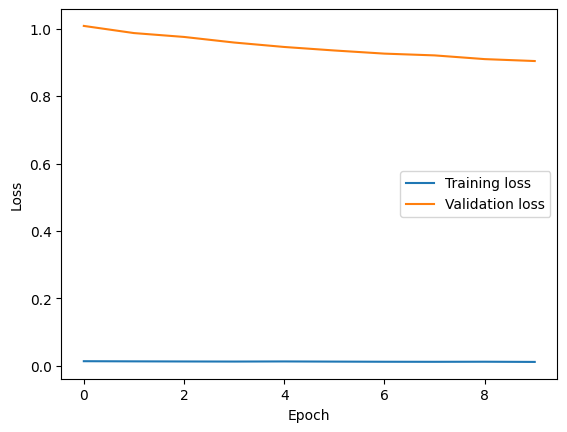

Train Losses:  [0.013800056749268583, 0.013343661827476401, 0.012996306936991843, 0.01273535721396145, 0.013099583552071923, 0.012592711338871404, 0.012171113373417603, 0.012002625943798768, 0.012253211124947197, 0.01166677945538571]
Validation Losses:  [1.0079804227121636, 0.9867765849532601, 0.9753120850592735, 0.9587399714682624, 0.945566322355756, 0.9351536995650468, 0.9258340871646168, 0.9206001379396025, 0.909564731895641, 0.9038617258046342]



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = image_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')



# Test Model


model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

Class  0


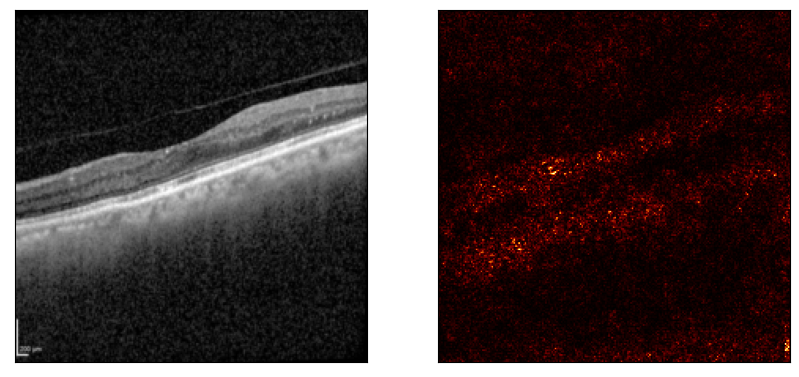

Class  1


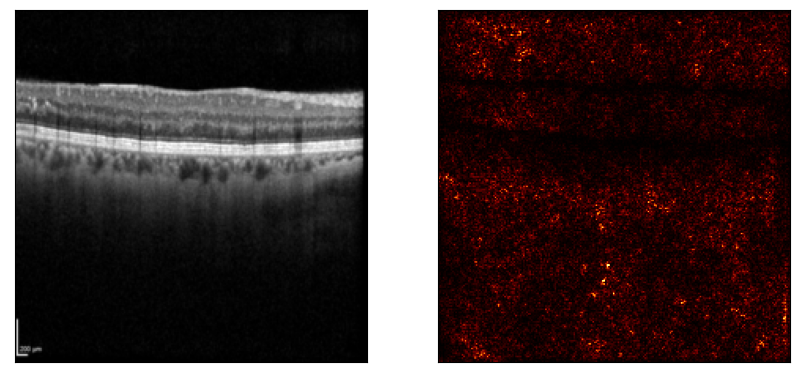

Class  2


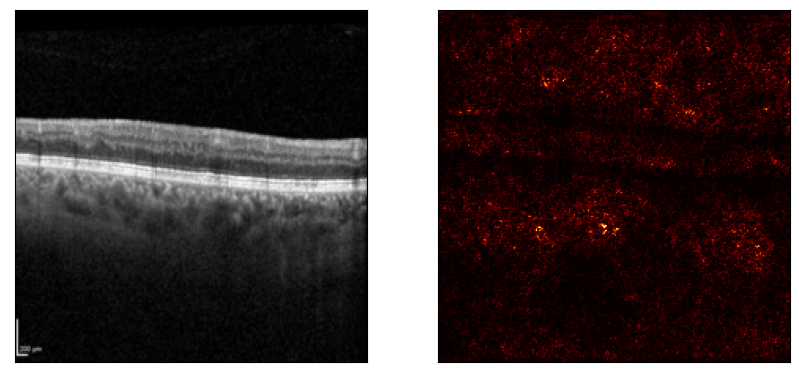

In [10]:
# Visualize
img = image_testset[1000][0]
img2 = image_testset[3000][0]
img3 = image_testset[7986][0]

print("Class ", image_testset[1000][1])
saliency_map(img, model)
print("Class ", image_testset[3000][1])
saliency_map(img2, model)
print("Class ", image_testset[7986][1])
saliency_map(img3, model)

# Crop

c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.054
[1,   200] loss: 1.028
[1,   300] loss: 1.020
Train accuracy after epoch 1: 48.24 %
Validation accuracy after epoch 1: 50.26 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.01
[2,   100] loss: 1.014
[2,   200] loss: 1.000
[2,   300] loss: 0.998
Train accuracy after epoch 2: 50.17 %
Validation accuracy after epoch 2: 49.68 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 1.00
[3,   100] loss: 0.995
[3,   200] loss: 0.984
[3,   300] loss: 0.981
Train accuracy after epoch 3: 51.36 %
Validation accuracy after epoch 3: 52.30 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.98
[4,   100] loss: 0.971
[4,   200] loss: 0.977
[4,   300] loss: 0.971
Train accuracy after epoch 4: 52.02 %
Validation accuracy after epoch 4: 53.47 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.97
[5,   100] loss: 0.969
[5,   200] loss: 0.958
[5,   300] loss: 0.957
Train accuracy after epoch 5: 52.83 %
Valida

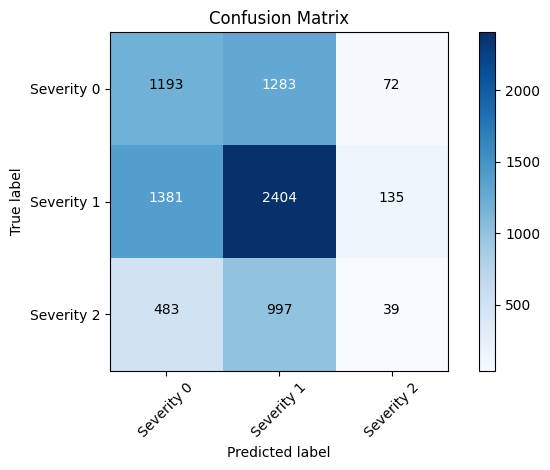

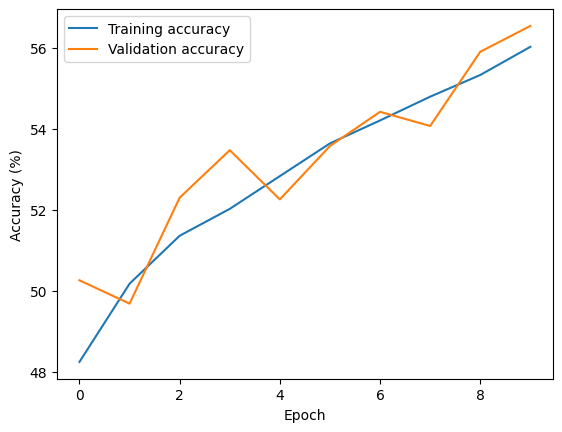

Train Accuracy:  [48.239781454564195, 50.17267151177774, 51.35817741353539, 52.02309159321685, 52.832328230503585, 53.64156486779032, 54.20854595123963, 54.796144528632546, 55.33219937116643, 56.02803979176331]
Validation Accuracy:  [50.2576788291074, 49.68047825190683, 52.298495155638015, 53.47351061636776, 52.25726654298083, 53.57658214801072, 54.42176870748299, 54.07132549989693, 55.90599876314162, 56.54504225932797]



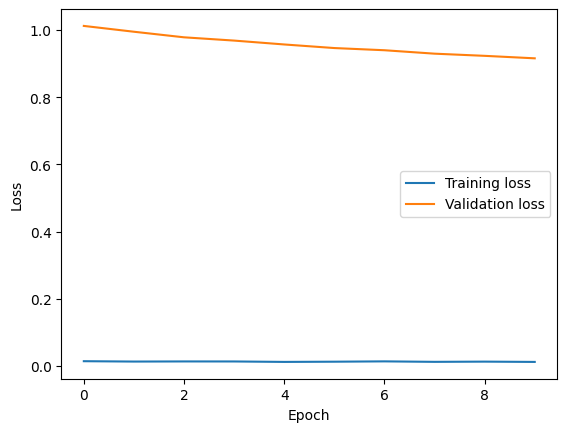

Train Losses:  [0.013948106255970504, 0.012862016103769603, 0.013237583990159788, 0.013160998687932366, 0.011833098962118751, 0.012461401914295397, 0.013435864330906617, 0.012017236924485156, 0.012670547554367468, 0.011791567073056572]
Validation Losses:  [1.0123344173113897, 0.9950203904784161, 0.9784087188414411, 0.9686725160751705, 0.957120797715711, 0.9464388319669962, 0.9399268788004679, 0.9297089483216482, 0.9232480927512366, 0.9158442833821224]



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = crop_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')


# Test Model


model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

Class  0


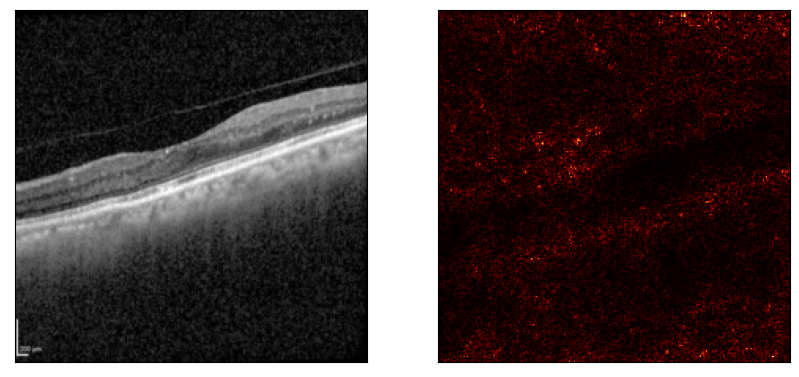

Class  1


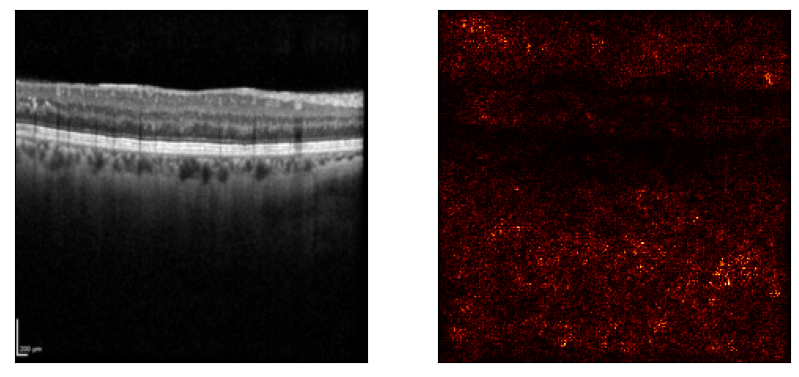

Class  2


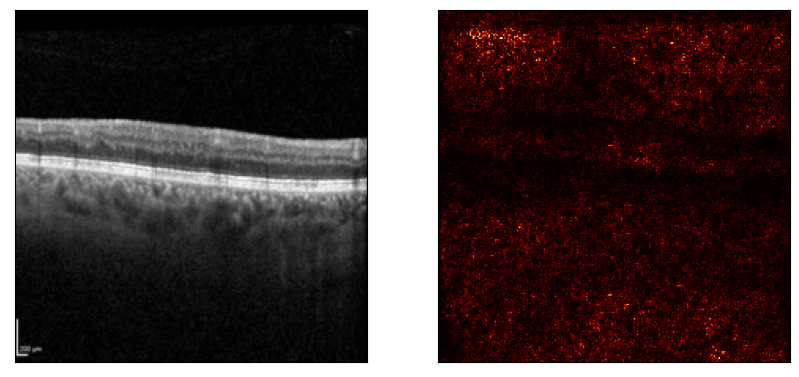

In [12]:
# Visualize
img = image_testset[1000][0]
img2 = image_testset[3000][0]
img3 = image_testset[7986][0]

print("Class ", image_testset[1000][1])
saliency_map(img, model)
print("Class ", image_testset[3000][1])
saliency_map(img2, model)
print("Class ", image_testset[7986][1])
saliency_map(img3, model)

# Original + Crop

c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.043
[1,   200] loss: 1.039
[1,   300] loss: 1.026
[1,   400] loss: 1.016
[1,   500] loss: 1.015
[1,   600] loss: 1.004
Train accuracy after epoch 1: 48.37 %
Validation accuracy after epoch 1: 49.41 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.00
[2,   100] loss: 1.000
[2,   200] loss: 0.992
[2,   300] loss: 0.982
[2,   400] loss: 0.983
[2,   500] loss: 0.975
[2,   600] loss: 0.974
Train accuracy after epoch 2: 50.26 %
Validation accuracy after epoch 2: 52.09 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.97
[3,   100] loss: 0.967
[3,   200] loss: 0.964
[3,   300] loss: 0.960
[3,   400] loss: 0.958
[3,   500] loss: 0.960
[3,   600] loss: 0.948
Train accuracy after epoch 3: 52.60 %
Validation accuracy after epoch 3: 53.19 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.95
[4,   100] loss: 0.947
[4,   200] loss: 0.936
[4,   300] loss: 0.940
[4,   400] loss: 0.937
[4,   500] loss: 0.928
[4,   60

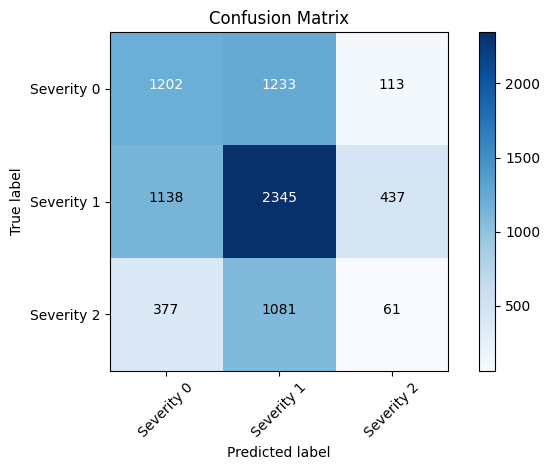

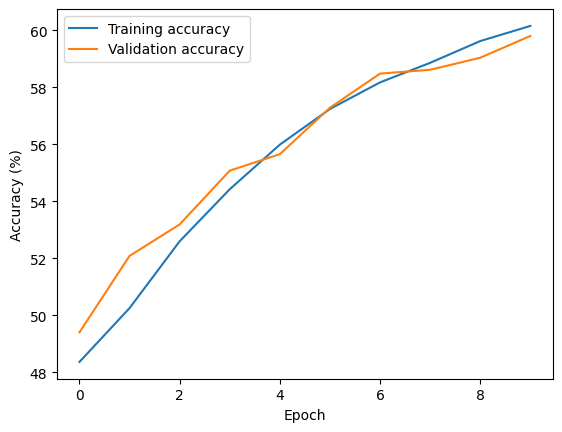

Train Accuracy:  [48.369971393964384, 50.256423472411925, 52.59902584851687, 54.42362703914646, 55.9879390768755, 57.23784243486328, 58.17075999278406, 58.856273999433036, 59.61910161585445, 60.149988402958535]
Validation Accuracy:  [49.4072776002474, 52.08741366869395, 53.19039274301618, 55.07679620657664, 55.65405628285744, 57.28275435522111, 58.47850737037419, 58.61251417379651, 59.03515101535924, 59.797958973301725]



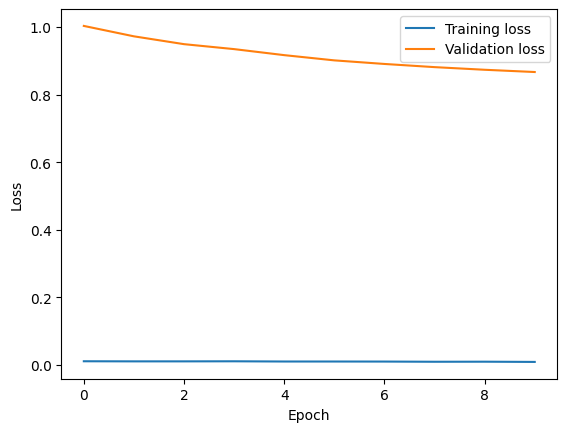

Train Losses:  [0.011413361232795275, 0.011096048885358027, 0.011099597276533651, 0.011316905893643174, 0.01066987822829597, 0.0106424439876437, 0.010505356250524128, 0.009937872996636631, 0.010125997628175839, 0.009449581141526853]
Validation Losses:  [1.0029934171167505, 0.9722205244036215, 0.9490537684352824, 0.9344085597792872, 0.9165896528124281, 0.901126410933871, 0.8905308550872111, 0.8811487492526048, 0.8733405697260944, 0.8666775320537459]



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = concatenated_dataset = ConcatDataset([image_trainset, crop_trainset])
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')




# Test Model


model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

Class  0


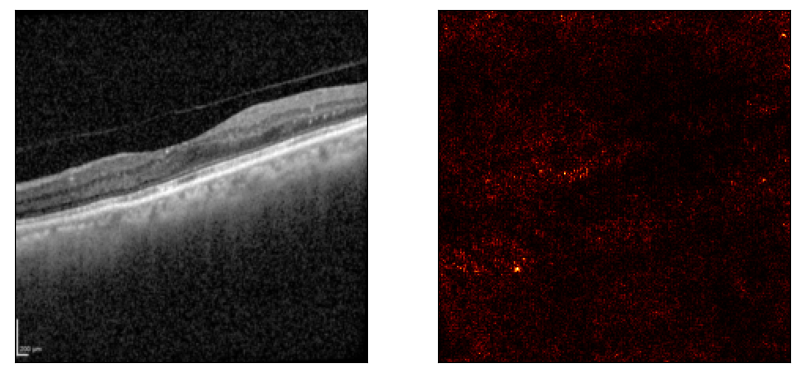

Class  1


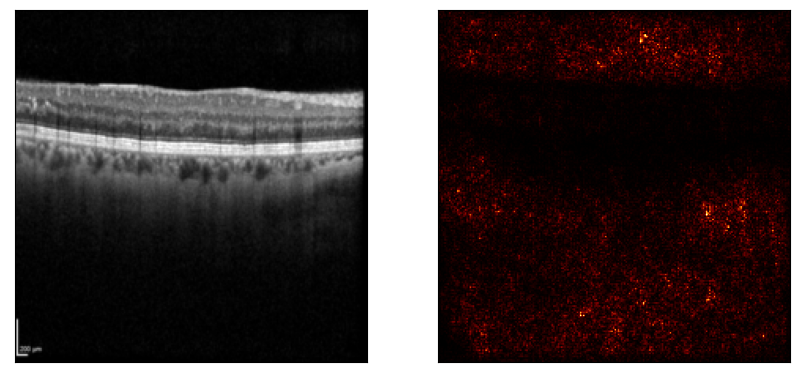

Class  2


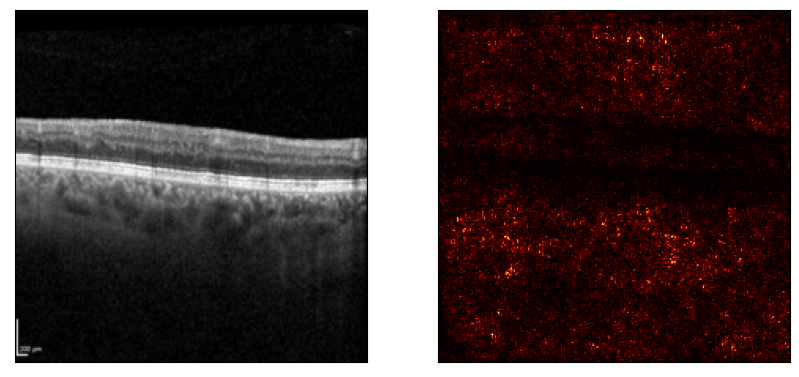

In [14]:
# Visualize
img = image_testset[1000][0]
img2 = image_testset[3000][0]
img3 = image_testset[7986][0]

print("Class ", image_testset[1000][1])
saliency_map(img, model)
print("Class ", image_testset[3000][1])
saliency_map(img2, model)
print("Class ", image_testset[7986][1])
saliency_map(img3, model)

# Original + Flip

c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.057
[1,   200] loss: 1.030
[1,   300] loss: 1.020
[1,   400] loss: 1.019
[1,   500] loss: 1.003
[1,   600] loss: 1.005
Train accuracy after epoch 1: 48.04 %
Validation accuracy after epoch 1: 49.73 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.00
[2,   100] loss: 0.988
[2,   200] loss: 0.991
[2,   300] loss: 0.990
[2,   400] loss: 0.983
[2,   500] loss: 0.975
[2,   600] loss: 0.978
Train accuracy after epoch 2: 50.53 %
Validation accuracy after epoch 2: 52.15 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.97
[3,   100] loss: 0.963
[3,   200] loss: 0.958
[3,   300] loss: 0.961
[3,   400] loss: 0.967
[3,   500] loss: 0.953
[3,   600] loss: 0.955
Train accuracy after epoch 3: 52.69 %
Validation accuracy after epoch 3: 53.69 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.95
[4,   100] loss: 0.944
[4,   200] loss: 0.944
[4,   300] loss: 0.950
[4,   400] loss: 0.938
[4,   500] loss: 0.932
[4,   60

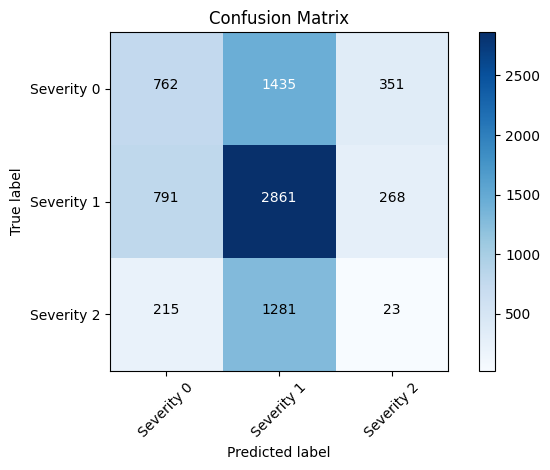

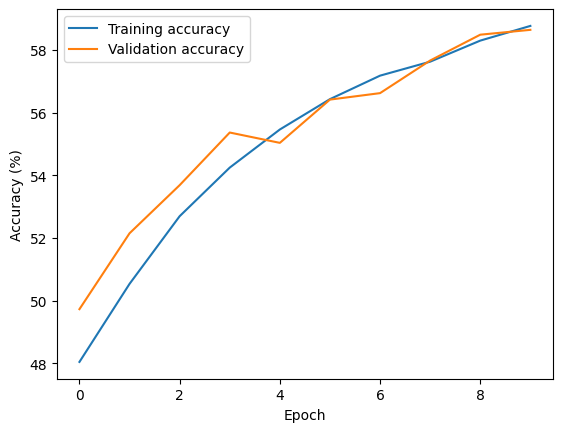

Train Accuracy:  [48.04267711259439, 50.53475246759271, 52.694379300569544, 54.245805736669844, 55.462206530422904, 56.431203772904155, 57.18114578769683, 57.62698760405123, 58.299616009071464, 58.768651908357604]
Validation Accuracy:  [49.72683228533141, 52.149262962581176, 53.685187094114006, 55.36542624471704, 55.03556334398515, 56.41686424079992, 56.623028553757344, 57.66415833419235, 58.488815586022056, 58.64343882074013]



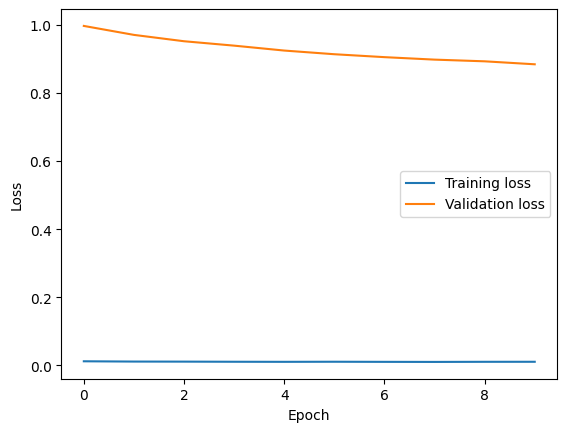

Train Losses:  [0.012065419942582459, 0.01123633062623478, 0.011048936765315702, 0.010684553048952408, 0.010465247136167874, 0.01073154026436845, 0.010401974399950005, 0.010193629751881029, 0.01053291745790736, 0.010617152764730438]
Validation Losses:  [0.9970970114485872, 0.97075742453647, 0.9521007202677033, 0.9391605388428819, 0.9247373941202481, 0.9139522328018933, 0.9053790374719387, 0.8981070570227608, 0.8931296209910029, 0.8844063229726008]



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = concatenated_dataset = ConcatDataset([image_trainset, flip_trainset])
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')




# Test Model


model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

Class  0


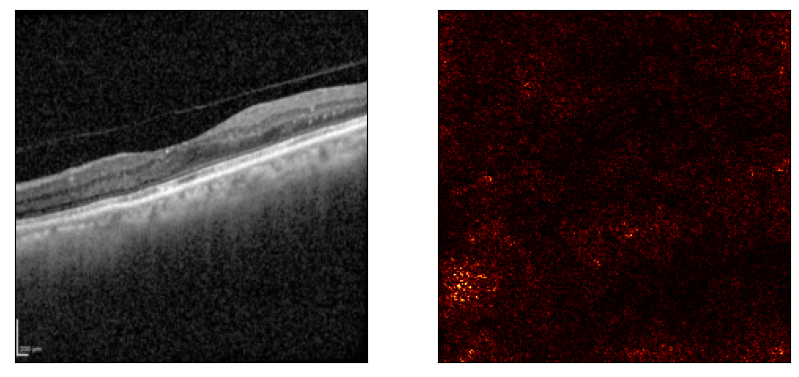

Class  1


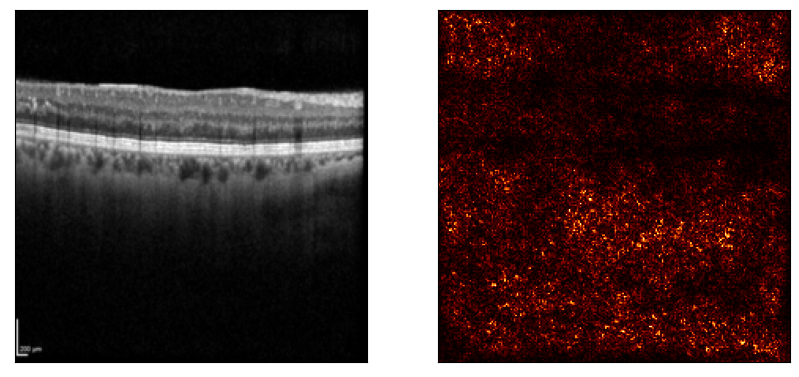

Class  2


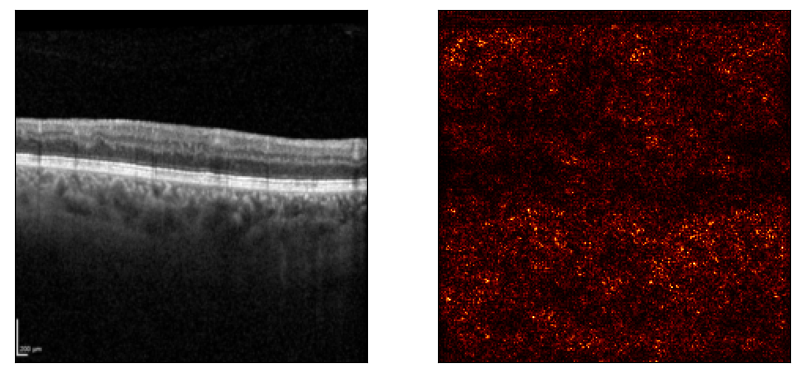

In [16]:
# Visualize
img = image_testset[1000][0]
img2 = image_testset[3000][0]
img3 = image_testset[7986][0]

print("Class ", image_testset[1000][1])
saliency_map(img, model)
print("Class ", image_testset[3000][1])
saliency_map(img2, model)
print("Class ", image_testset[7986][1])
saliency_map(img3, model)

# Original + Flip2

c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.120
[1,   200] loss: 1.059
[1,   300] loss: 1.037
Train accuracy after epoch 1: 45.65 %
Validation accuracy after epoch 1: 52.57 %
Train loss after epoch 1: 0.18
Validation loss after epoch 1: 1.02
[2,   100] loss: 1.004
[2,   200] loss: 0.988
[2,   300] loss: 0.971
Train accuracy after epoch 2: 55.28 %
Validation accuracy after epoch 2: 56.80 %
Train loss after epoch 2: 0.16
Validation loss after epoch 2: 0.96
[3,   100] loss: 0.949
[3,   200] loss: 0.931
[3,   300] loss: 0.926
Train accuracy after epoch 3: 58.04 %
Validation accuracy after epoch 3: 58.87 %
Train loss after epoch 3: 0.16
Validation loss after epoch 3: 0.92
[4,   100] loss: 0.905
[4,   200] loss: 0.891
[4,   300] loss: 0.884
Train accuracy after epoch 4: 59.66 %
Validation accuracy after epoch 4: 59.82 %
Train loss after epoch 4: 0.15
Validation loss after epoch 4: 0.88
[5,   100] loss: 0.860
[5,   200] loss: 0.867
[5,   300] loss: 0.861
Train accuracy after epoch 5: 60.78 %
Valida

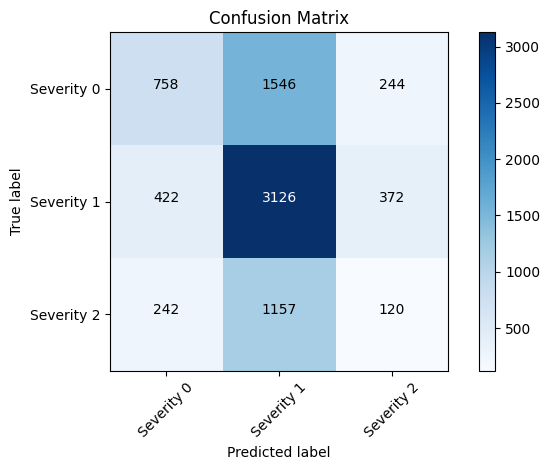

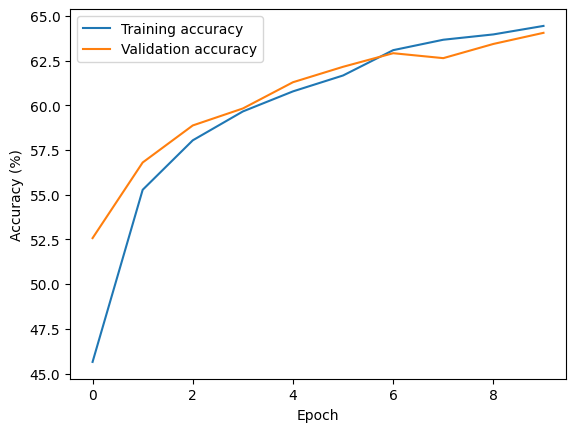

Train Accuracy:  [45.64841996201002, 55.27542738732516, 58.0426523916422, 59.65722673113452, 60.779658090139876, 61.66896908996719, 63.08495941978933, 63.66776031773441, 63.96563633223968, 64.44051113797272]
Validation Accuracy:  [52.572513812154696, 56.802486187845304, 58.8743093922652, 59.82389502762431, 61.2914364640884, 62.15469613259668, 62.91436464088398, 62.63812154696133, 63.43232044198895, 64.05386740331491]



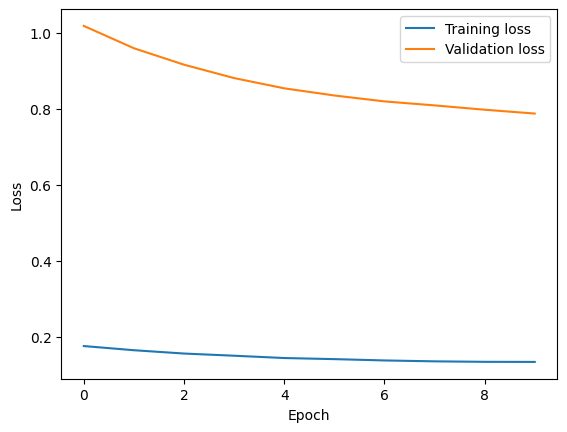

Train Losses:  [0.17527700310253966, 0.16430890790665348, 0.15556634147522858, 0.14983795591480825, 0.14376647367003215, 0.14087620163490758, 0.13741210778115204, 0.13504301513756178, 0.13377074082253387, 0.1335165411727863]
Validation Losses:  [1.0178593324692868, 0.9590994903395847, 0.9158212927823567, 0.8805520850650513, 0.8536210303807127, 0.8347826511161762, 0.8192005098195366, 0.808691989321735, 0.7973209691969729, 0.7872096438434243]



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = ConcatDataset([image_trainset, flip_trainset_class_2])
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')


# Test Model


model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

Class  0


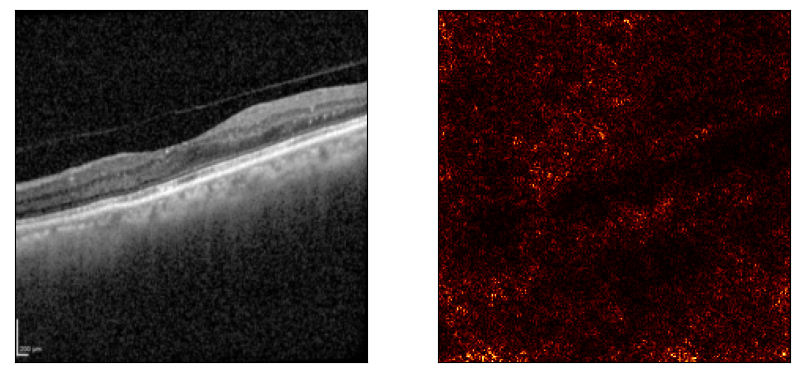

Class  1


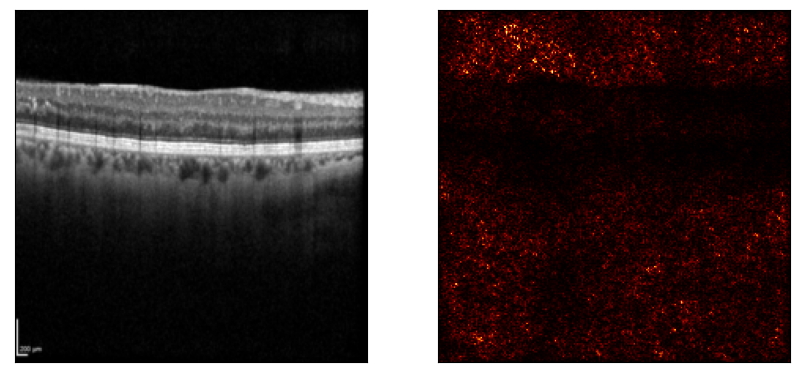

Class  2


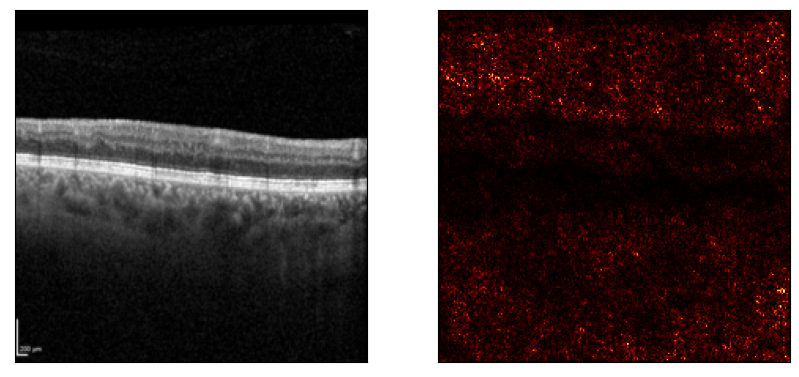

In [18]:
# Visualize
img = image_testset[1000][0]
img2 = image_testset[3000][0]
img3 = image_testset[7986][0]

print("Class ", image_testset[1000][1])
saliency_map(img, model)
print("Class ", image_testset[3000][1])
saliency_map(img2, model)
print("Class ", image_testset[7986][1])
saliency_map(img3, model)

# Learning Rate

## LR = 0.00001 

c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.156
[1,   200] loss: 1.070
[1,   300] loss: 1.047
Train accuracy after epoch 1: 40.06 %
Validation accuracy after epoch 1: 47.58 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.05
[2,   100] loss: 1.044
[2,   200] loss: 1.046
[2,   300] loss: 1.040
Train accuracy after epoch 2: 48.11 %
Validation accuracy after epoch 2: 48.24 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 1.04
[3,   100] loss: 1.038
[3,   200] loss: 1.038
[3,   300] loss: 1.044
Train accuracy after epoch 3: 48.30 %
Validation accuracy after epoch 3: 48.07 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 1.04
[4,   100] loss: 1.043
[4,   200] loss: 1.031
[4,   300] loss: 1.037
Train accuracy after epoch 4: 48.35 %
Validation accuracy after epoch 4: 47.95 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 1.04
[5,   100] loss: 1.031
[5,   200] loss: 1.034
[5,   300] loss: 1.034
Train accuracy after epoch 5: 48.65 %
Valida

c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


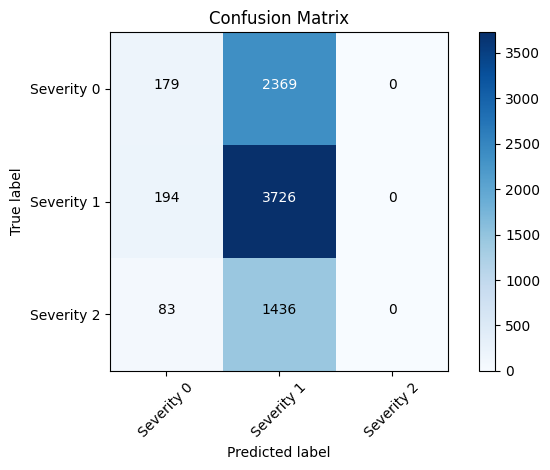

Balanced accuracy: 0.3402537938252224
Accuracy of the network on the 7987 test images: 48 %


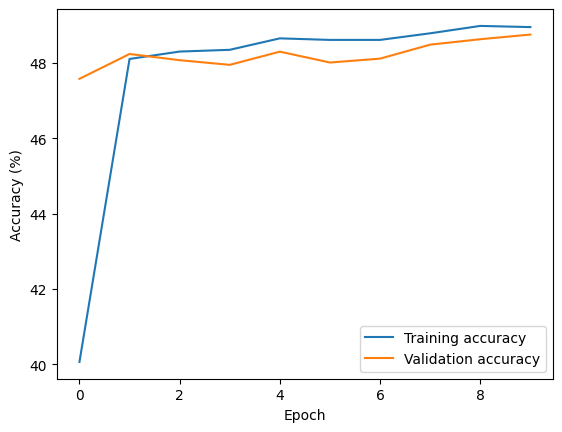

Train Accuracy:  [40.06494510592238, 48.10576774393073, 48.30163393639503, 48.34802329776816, 48.65213133343642, 48.6108963455492, 48.6108963455492, 48.78614504406989, 48.9820112365342, 48.951084995618785]
Validation Accuracy:  [47.577819006390435, 48.23747680890538, 48.07256235827664, 47.94887652030509, 48.29931972789116, 48.01071943929087, 48.11379097093383, 48.484848484848484, 48.62914862914863, 48.75283446712018]



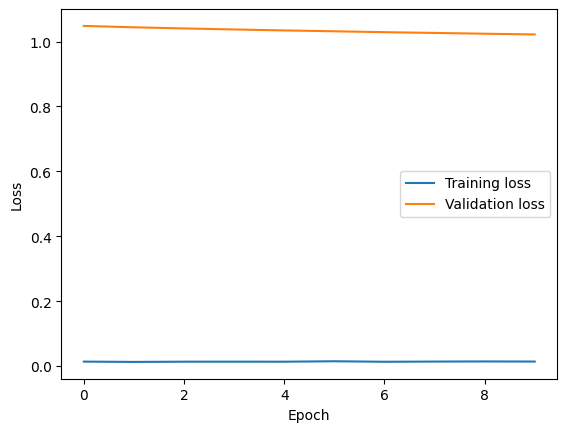

Train Losses:  [0.013626501356300554, 0.012679401392999449, 0.01339969509526303, 0.013430069347745493, 0.013365822599122399, 0.014724178141669222, 0.013151183332267561, 0.0137760492139741, 0.014167546833816328, 0.013817617767735532]
Validation Losses:  [1.0480208040831924, 1.0438077605353069, 1.0402823340841185, 1.0371543989061596, 1.0341671269791712, 1.0315045983096884, 1.0287652021829576, 1.026404403185407, 1.0239786137209508, 1.0217909431536156]



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

balanced_acc_lr = []
alphas = []

raw_train_dataset = image_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.00001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')



# Test Model

model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_acc_lr.append(balanced_acc)
alphas.append(lr)

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

# LR = 0.0001

c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.065
[1,   200] loss: 1.036
[1,   300] loss: 1.030
Train accuracy after epoch 1: 47.30 %
Validation accuracy after epoch 1: 48.44 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.02
[2,   100] loss: 1.015
[2,   200] loss: 1.009
[2,   300] loss: 1.008
Train accuracy after epoch 2: 49.13 %
Validation accuracy after epoch 2: 50.32 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 1.00
[3,   100] loss: 0.993
[3,   200] loss: 0.988
[3,   300] loss: 0.987
Train accuracy after epoch 3: 50.29 %
Validation accuracy after epoch 3: 50.13 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.98
[4,   100] loss: 0.981
[4,   200] loss: 0.970
[4,   300] loss: 0.966
Train accuracy after epoch 4: 51.24 %
Validation accuracy after epoch 4: 52.22 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.96
[5,   100] loss: 0.951
[5,   200] loss: 0.965
[5,   300] loss: 0.955
Train accuracy after epoch 5: 52.53 %
Valida

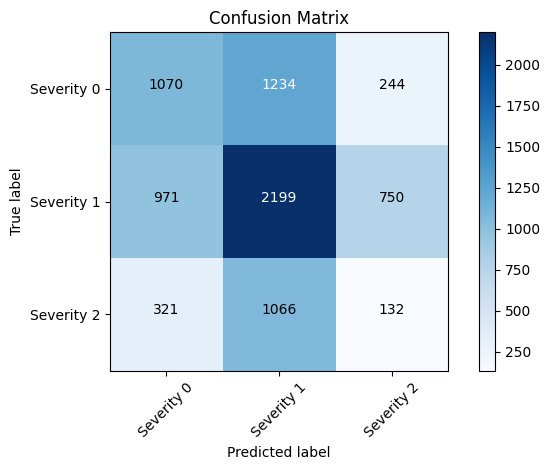

Balanced accuracy: 0.35593528974865385
Accuracy of the network on the 7987 test images: 42 %


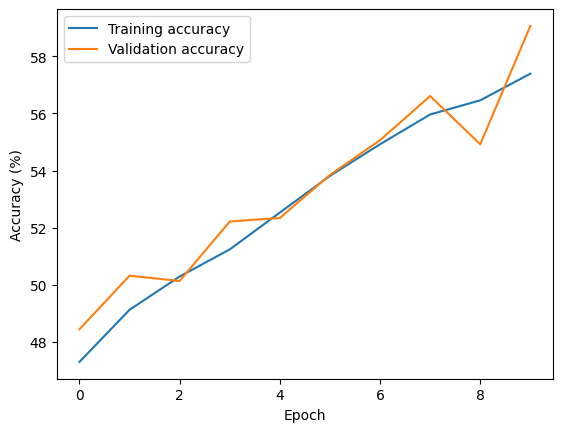

Train Accuracy:  [47.30168548012989, 49.126333694139475, 50.29122210195351, 51.23962682335962, 52.52822019483532, 53.81165919282511, 54.91984949229421, 55.96103293644658, 56.45585279109324, 57.388794392041646]
Validation Accuracy:  [48.4436198721913, 50.31952174809317, 50.13399299113585, 52.216037930323644, 52.339723768295194, 53.84456813028242, 55.06081220366934, 56.60688517831375, 54.916512059369204, 59.059987631416206]



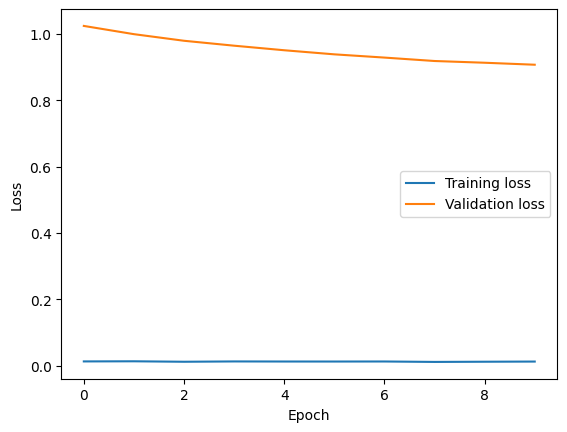

Train Losses:  [0.013204464394795267, 0.013599694363380732, 0.012208795469058188, 0.01315993972514805, 0.012921012938022614, 0.012868233613277736, 0.013010067179014808, 0.011694522672577909, 0.01228173586883043, 0.012790067611556304]
Validation Losses:  [1.0242132601160974, 0.9993763236354686, 0.9794751957651758, 0.9646285194584916, 0.9508958493181416, 0.9385702334293703, 0.9288065767465142, 0.9184905304856655, 0.9132697835604546, 0.907278800251508]



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = image_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.0001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')





# Test Model
model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()






# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_acc_lr.append(balanced_acc)
alphas.append(lr)

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

# LR = 0.001

c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.036
[1,   200] loss: 1.004
[1,   300] loss: 0.973
Train accuracy after epoch 1: 49.74 %
Validation accuracy after epoch 1: 54.32 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 0.95
[2,   100] loss: 0.952
[2,   200] loss: 0.933
[2,   300] loss: 0.920
Train accuracy after epoch 2: 54.13 %
Validation accuracy after epoch 2: 56.85 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.93
[3,   100] loss: 0.905
[3,   200] loss: 0.899
[3,   300] loss: 0.897
Train accuracy after epoch 3: 56.70 %
Validation accuracy after epoch 3: 56.75 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.89
[4,   100] loss: 0.882
[4,   200] loss: 0.864
[4,   300] loss: 0.872
Train accuracy after epoch 4: 58.76 %
Validation accuracy after epoch 4: 59.20 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.86
[5,   100] loss: 0.846
[5,   200] loss: 0.851
[5,   300] loss: 0.849
Train accuracy after epoch 5: 60.44 %
Valida

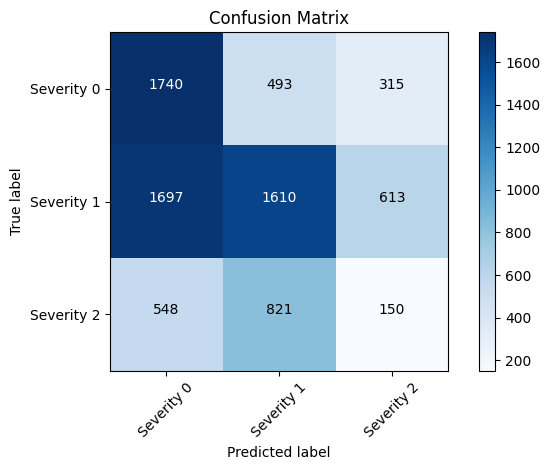

Balanced accuracy: 0.39745066761195796
Accuracy of the network on the 7987 test images: 43 %


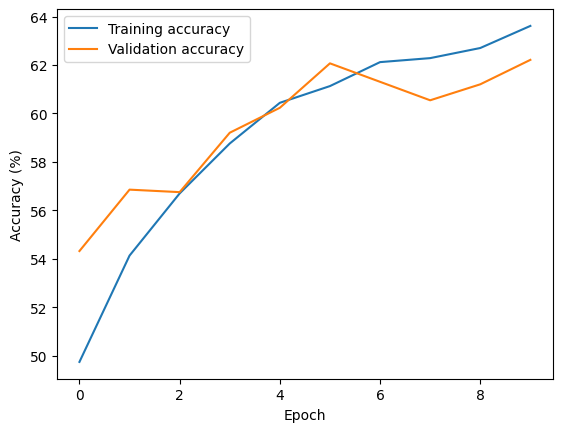

Train Accuracy:  [49.73970413896191, 54.131230348951085, 56.698108344930674, 58.75985773929179, 60.4401834956961, 61.13086954280707, 62.120509252100405, 62.2854492036493, 62.70295345600742, 63.615277563012214]
Validation Accuracy:  [54.318697175840036, 56.85425685425685, 56.75118532261389, 59.204287775716345, 60.23500309214595, 62.06967635539064, 61.30694702123274, 60.54421768707483, 61.20387548958978, 62.21397649969079]



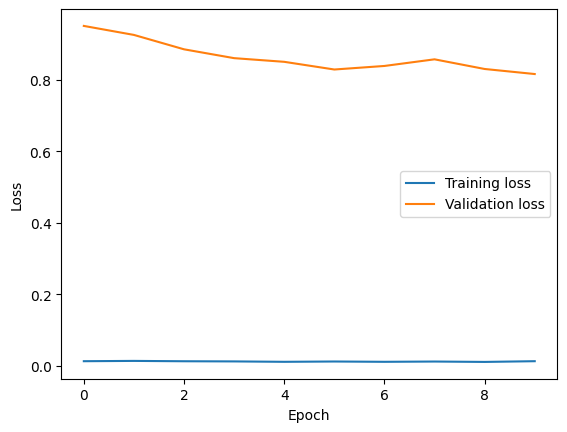

Train Losses:  [0.012293523471606406, 0.013115694648341128, 0.012156397300331216, 0.011703300632928548, 0.010576556779836354, 0.011453914407052491, 0.010582114520825837, 0.01136547346648417, 0.01027362029019155, 0.012309773187888296]
Validation Losses:  [0.9505955890708795, 0.9254143266450792, 0.8851434294771003, 0.8603932985667715, 0.8501385230055742, 0.8286207502735101, 0.8385480991026171, 0.8571170807327101, 0.8300875317703889, 0.8159423573708637]



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = image_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.001
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')


# Test Model

model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()



# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))

balanced_acc_lr.append(balanced_acc)
alphas.append(lr)

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

# LR = 0.01

c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 1.208
[1,   200] loss: 1.064
[1,   300] loss: 0.978
Train accuracy after epoch 1: 48.54 %
Validation accuracy after epoch 1: 37.15 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.22
[2,   100] loss: 1.010
[2,   200] loss: 0.908
[2,   300] loss: 0.963
Train accuracy after epoch 2: 54.79 %
Validation accuracy after epoch 2: 62.89 %
Train loss after epoch 2: 0.01
Validation loss after epoch 2: 0.85
[3,   100] loss: 0.904
[3,   200] loss: 0.878
[3,   300] loss: 0.933
Train accuracy after epoch 3: 57.74 %
Validation accuracy after epoch 3: 57.49 %
Train loss after epoch 3: 0.01
Validation loss after epoch 3: 0.94
[4,   100] loss: 0.840
[4,   200] loss: 0.913
[4,   300] loss: 0.912
Train accuracy after epoch 4: 58.85 %
Validation accuracy after epoch 4: 62.83 %
Train loss after epoch 4: 0.01
Validation loss after epoch 4: 0.81
[5,   100] loss: 0.866
[5,   200] loss: 0.870
[5,   300] loss: 0.845
Train accuracy after epoch 5: 60.31 %
Valida

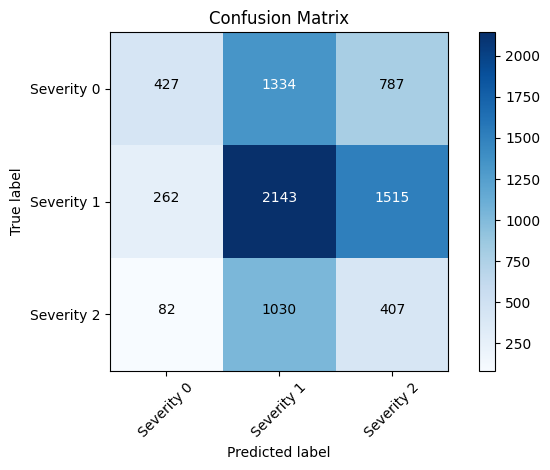

Balanced accuracy: 0.32740184162995223
Accuracy of the network on the 7987 test images: 37 %


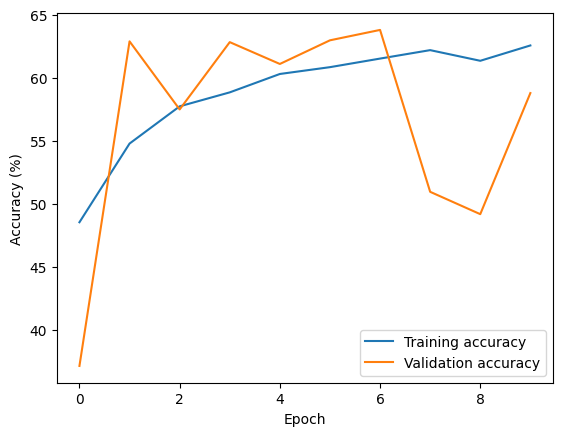

Train Accuracy:  [48.54388949023246, 54.78583578166074, 57.73929178908304, 58.847482088552134, 60.30616978506263, 60.847379001082416, 61.52775630122159, 62.19782485438895, 61.35250760270089, 62.56893974537395]
Validation Accuracy:  [37.14698000412286, 62.894248608534326, 57.49330035044321, 62.832405689548544, 61.100803957946816, 62.97670583384869, 63.801278086992376, 50.95856524427953, 49.18573490002061, 58.79200164914451]



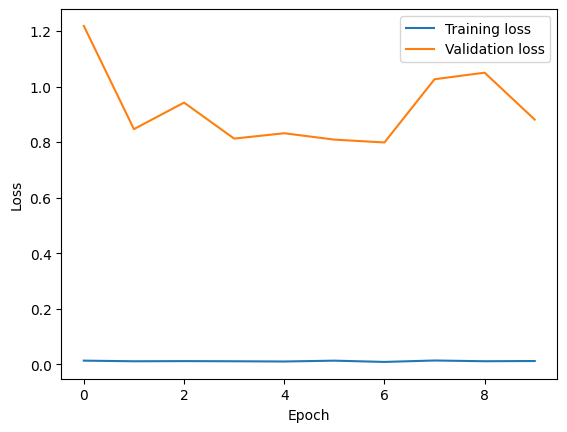

Train Losses:  [0.013035013095328682, 0.01075890777926696, 0.011341725525103118, 0.01077616038291078, 0.009933505011232276, 0.012942886078043989, 0.008404212856763288, 0.013507468920004996, 0.01088578999042511, 0.011705126613378525]
Validation Losses:  [1.2182290643742344, 0.8466222977864327, 0.9421913052214664, 0.812534967001579, 0.8318123556711924, 0.8088781197300599, 0.798593907878709, 1.0262920499413166, 1.049853929783285, 0.8808883660553756]



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = image_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.01
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')


# Test Model

model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()


# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


balanced_acc_lr.append(lr)
alphas.append(lr)

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

# LR = 0.1

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torchvision.models import resnet18

raw_train_dataset = image_trainset
test_dataset = image_testset

train_labels = [label for _, label in raw_train_dataset]

# Split the dataset into training and validation sets with stratified sampling
train_dataset, val_dataset = train_test_split(raw_train_dataset, test_size=0.2, random_state=42, stratify=train_labels)

# Parameters
batch_size = 64

lr = 0.1
gamma = 0.001
epochs = 10

num_classes = 3 

# Load your training and validation dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Load the pre-trained ResNet-18 model and modify it for grayscale images
model = resnet18(pretrained=True)
num_features = model.fc.in_features
num_classes=3

#freeze layers
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True


model.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=3, bias=False)
model.fc = nn.Linear(num_features, 3)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=gamma)
criterion = nn.CrossEntropyLoss()

# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

train_acc = []
val_acc = []

train_losses = []
val_losses = []

# Train the model
print("Beginning Training")
for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
    
    # Evaluate the model on the validation set after each epoch
    correct_val = 0
    total_val = 0
    train_loss = running_loss / len(train_loader)
    val_loss = 0.0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            # calculates validation loss
            val_loss += criterion(outputs, labels).item() * inputs.size(0)
        val_loss /= len(val_dataset)

    # save accuracies and print
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)
    val_accuracy = 100 * correct_val / total_val
    val_acc.append(val_accuracy)
    print('Train accuracy after epoch %d: %.2f %%' % (epoch + 1, train_accuracy))
    print('Validation accuracy after epoch %d: %.2f %%' % (epoch + 1, val_accuracy))

    # save losses and print
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print('Train loss after epoch %d: %.2f' % (epoch + 1, train_loss))
    print('Validation loss after epoch %d: %.2f' % (epoch + 1, val_loss))

print('Finished Training')


c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\jgril\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Beginning Training
[1,   100] loss: 10.200
[1,   200] loss: 4.153
[1,   300] loss: 2.990
Train accuracy after epoch 1: 44.66 %
Validation accuracy after epoch 1: 49.89 %
Train loss after epoch 1: 0.01
Validation loss after epoch 1: 1.48
[2,   100] loss: 1.821
[2,   200] loss: 3.071
[2,   300] loss: 2.078
Train accuracy after epoch 2: 50.72 %
Validation accuracy after epoch 2: 41.37 %
Train loss after epoch 2: 0.04
Validation loss after epoch 2: 2.72
[3,   100] loss: 3.869
[3,   200] loss: 3.167
[3,   300] loss: 2.905
Train accuracy after epoch 3: 46.58 %
Validation accuracy after epoch 3: 53.66 %
Train loss after epoch 3: 0.03
Validation loss after epoch 3: 2.05
[4,   100] loss: 2.886
[4,   200] loss: 3.218
[4,   300] loss: 2.731
Train accuracy after epoch 4: 48.74 %
Validation accuracy after epoch 4: 36.59 %
Train loss after epoch 4: 0.04
Validation loss after epoch 4: 3.88
[5,   100] loss: 2.116
[5,   200] loss: 3.806
[5,   300] loss: 3.168
Train accuracy after epoch 5: 48.06 %
Valid

AttributeError: 'list' object has no attribute 'apend'

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.00      0.00      2548
           1       0.00      0.00      0.00      3920
           2       0.19      1.00      0.32      1519

    accuracy                           0.19      7987
   macro avg       0.22      0.33      0.11      7987
weighted avg       0.18      0.19      0.06      7987

Confusion matrix:
[[   6    0 2542]
 [   3    0 3917]
 [   4    0 1515]]


c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jgril\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


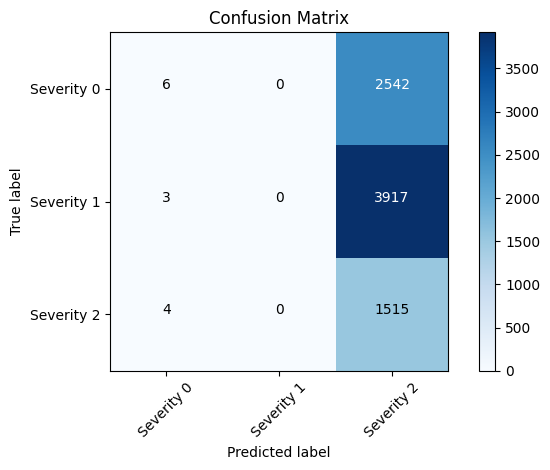

Balanced accuracy: 0.33324049222666735
Accuracy of the network on the 7987 test images: 19 %


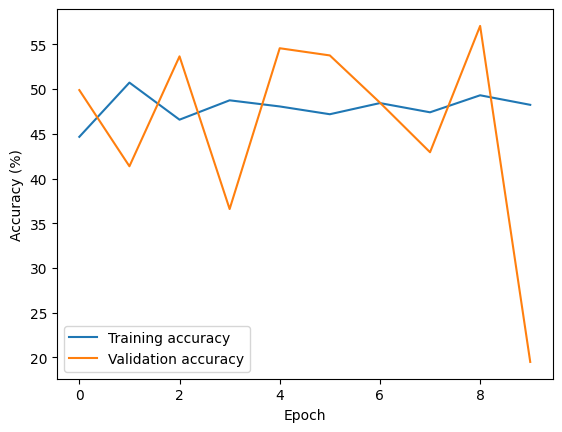

Train Accuracy:  [44.66264625534766, 50.72418947476934, 46.5800731921035, 48.74491005618267, 48.0593783825576, 47.188289263440026, 48.4356476470285, 47.404772949847946, 49.306736766146074, 48.239781454564195]
Validation Accuracy:  [49.88662131519274, 41.37291280148423, 53.659039373325086, 36.59039373325088, 54.566068851783136, 53.76211090496805, 48.484848484848484, 42.939600082457225, 57.060399917542775, 19.501133786848072]



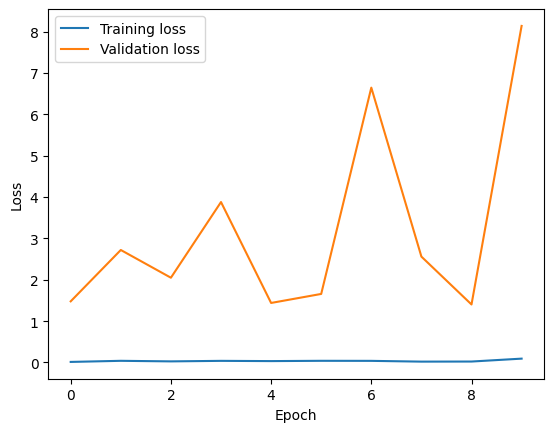

Train Losses:  [0.013946962003645143, 0.040690621655238304, 0.027080702154259933, 0.03970128964436682, 0.03383802740197433, 0.04086739413048092, 0.03959612940487109, 0.021143152035380666, 0.023202422810228246, 0.09345865014352296]
Validation Losses:  [1.4791340880284873, 2.721032845558665, 2.050372984600519, 3.880405057117979, 1.4399916957123111, 1.6581922842040304, 6.647243054078746, 2.5607737574324707, 1.4033315822135, 8.139851130546676]



In [24]:
balanced_acc_lr.append(balanced_acc)
alphas.append(lr)


model.eval()
total_correct = 0
total_images = 0
true_labels = []
predicted_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        true_labels += labels.tolist()
        predicted_labels += predicted.tolist()
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()






# calculate recall, precision, and F1 score
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

# create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:")
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'], rotation=45)
plt.yticks(tick_marks, ['Severity 0', 'Severity 1', 'Severity 2'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

#get balanced accuracy and regular accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced accuracy:", balanced_acc)
print('Accuracy of the network on the %d test images: %d %%' % (total_images, 100 * total_correct / total_images))


# Plot the training and validation accuracy
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
print("Train Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)
print()


# Plot losses
plt.plot(range(epochs), train_losses, label='Training loss')
plt.plot(range(epochs), val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Train Losses: ", train_losses)
print("Validation Losses: ", val_losses)
print()

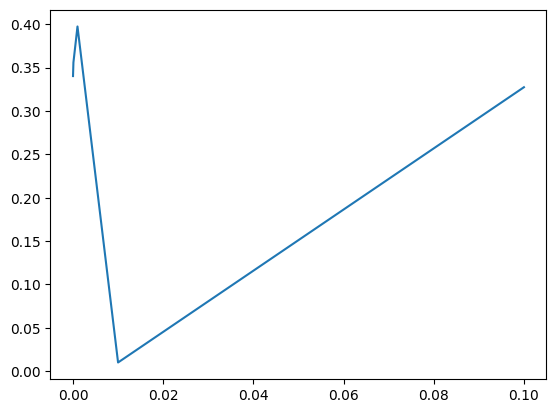

In [25]:
plt.plot(alphas, balanced_acc_lr)